#### Pivot and Pivot Tables

#### Pivot
Pivot allows you to transform or reshape your dataframe. If you have a df that looks like this...

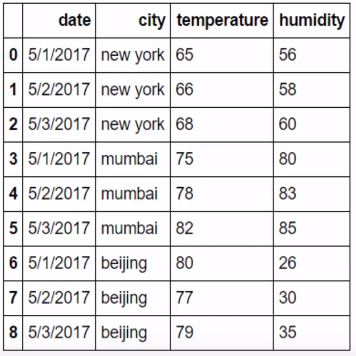

In [6]:
Image(filename = 'D:\Pandas\CodeBasics\pics\df01.jpg')

...we might want to transform the dataframe to something like this...

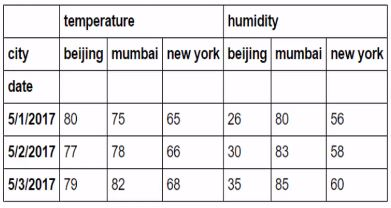

In [8]:
Image(filename = 'D:\Pandas\CodeBasics\pics\df02.jpg')

...or vice versa. All of this can be achieved using Pivot

In [5]:
import pandas as pd
from IPython.display import Image

In [13]:
df = pd.read_csv('D:\\Pandas\\CodeBasics\\datasets\\10_weather.csv', delimiter = '\t')

In [14]:
df # Here is our df from above

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/2/2017,new york,66,58
2,5/3/2017,new york,68,60
3,5/1/2017,mumbai,75,80
4,5/2/2017,mumbai,78,83
5,5/3/2017,mumbai,82,85
6,5/1/2017,beijing,80,26
7,5/2/2017,beijing,77,30
8,5/3/2017,beijing,79,35


In [15]:
df.pivot(index = 'date', columns = 'city')
#Pivot function takes a couple of arguments
#First, what do you want on your x axis or rows
#The second argument is columns

temperature                 humidity                
city         beijing mumbai new york  beijing mumbai new york
date                                                         
5/1/2017          80     75       65       26     80       56
5/2/2017          77     78       66       30     83       58
5/3/2017          79     82       68       35     85       60

We could have added another argument after columns for values to show us just the data that we want and nothing else, eg...

In [17]:
df01 = df.pivot(index = 'date', columns = 'city', values = 'humidity') 

In [19]:
df01 # To show us just the humidity data

city,beijing,mumbai,new york
date,,,
5/1/2017,26,80,56
5/2/2017,30,83,58
5/3/2017,35,85,60


If I wanted humidity to be my index and city to be my columns...

In [20]:
df03 = df.pivot(index = 'humidity', columns = 'city') 

In [21]:
df03 # We can reshape this data anyway that we want with Pivot

date                     temperature                
city       beijing    mumbai  new york     beijing mumbai new york
humidity                                                          
26        5/1/2017      None      None        80.0    NaN      NaN
30        5/2/2017      None      None        77.0    NaN      NaN
35        5/3/2017      None      None        79.0    NaN      NaN
56            None      None  5/1/2017         NaN    NaN     65.0
58            None      None  5/2/2017         NaN    NaN     66.0
60            None      None  5/3/2017         NaN    NaN     68.0
80            None  5/1/2017      None         NaN   75.0      NaN
83            None  5/2/2017      None         NaN   78.0      NaN
85            None  5/3/2017      None         NaN   82.0      NaN

#### Pivot Table
Pivot table allows you to summarize and aggregate data inside a dataframe

In [23]:
df04 = pd.read_csv('D:\\Pandas\\CodeBasics\\datasets\\10_weather02.csv', delimiter = '\t')
df04

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/1/2017,new york,61,54
2,5/2/2017,new york,70,60
3,5/2/2017,new york,72,62
4,5/1/2017,mumbai,75,80
5,5/1/2017,mumbai,78,83
6,5/2/2017,mumbai,82,85
7,5/2/2017,mumbai,80,26


Notice how we have two sets of data for each day. What we want to do is to create a df that contains an average temp, throughout the day, for all the temps and cities. This can be achieved using pivot tables...

In [24]:
df04.pivot_table(index = 'city', columns = 'date') # Looks pretty familiar to pivot

humidity          temperature         
date     5/1/2017 5/2/2017    5/1/2017 5/2/2017
city                                           
mumbai       81.5     55.5        76.5     81.0
new york     55.0     61.0        63.0     71.0

This shows me that for Mumbai, on 1st May 2017, the average temp was 81.5. 

In [28]:
df05 = df04.pivot_table(index = 'city', columns = 'date', aggfunc = 'sum')
df05

humidity          temperature         
date     5/1/2017 5/2/2017    5/1/2017 5/2/2017
city                                           
mumbai        163      111         153      162
new york      110      122         126      142

So we get the sum of the data that we have now for the whole day's data eg we get 163 for the humidity in Mumbai on the 1st May 2017, which is just the sum of the two humidity values, in df04, added together and presented in this aggregated form.

A full list of numpy aggregate functions can be found at - https://docs.scipy.org/doc/numpy/reference/routines.math.html . Instead of sum, I could put count, diff, mean (the default for aggfunc, so you don't have to supply anything to get the mean), etc etc etc.

margins = True - will add an all column and row for an average of all the values iun both the columns and rows.

#### Grouper
We can use grouper to get the average temp, for example, in the month of May even tho your df contains df contains data from many months

Documentation for Grouper can be found at - https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Grouper.html

In [30]:
df.grouper = pd.read_csv('D:\\Pandas\\CodeBasics\\datasets\\10_weather03.csv', delimiter = '\t')
df.grouper

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/2/2017,new york,61,54
2,5/3/2017,new york,70,60
3,12/1/2017,new york,30,50
4,12/2/2017,new york,28,52
5,12/3/2017,new york,25,51


#### Scenario 
We are going to pull out the data from just May and take an average of that

In [32]:
df.grouper['date'] = pd.to_datetime(df['date']) # To convert the date column to a datetime object

In [33]:
df.grouper.pivot_table(index = pd.Grouper(freq = 'M', key = 'date'), columns = 'city')
# freq = month as we are trying to find the average for the month of May
# key = 'date' as this is the column that we are running the command against
# columns = 'city' as before
# The date must be a valid with DatetimeIndex, TimedeltaIndex or PeriodIndex otherwise you get a TypeError


,humidity,temperature
city,new york,new york
date,,
2017-05-31,53.833333,46.5


Although this is what we wanted, the guy actually got an aggregate for both May and December but I only got one for May. I have no idea why. Actually, his results are totally different from mine!

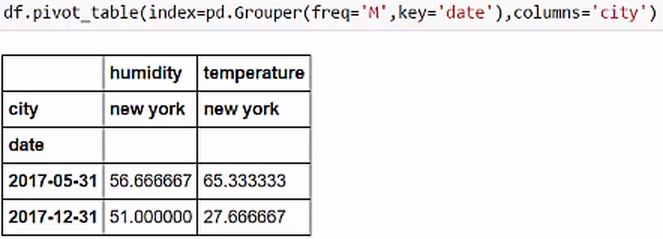

In [34]:
Image(filename = 'D:\Pandas\CodeBasics\pics\grouper.jpg')